In [1]:
import numpy as np
from numpy.linalg import norm
import scipy as sp
import ipywidgets as widgets
rng = np.random.default_rng(12345)
import matplotlib.pyplot as plt

In [222]:
from numpy.linalg import norm
from scipy.optimize import minimize


class Pedestrian:
    """Constructs a Pedestrian. Add target for preferred direction.
    Also fix direction change billiard style
    Parameters
    ----------
    steps : int, optional
            Number of steps the Pedestrian will perform.
    speed : float, optional
            determines the size of each step of the Pedestrian
    
    Returns
    -------
    out :  object"""
    
    def __init__(self, steps=20, speed=1, target="Random",
                 position="Random", personal_space=10):
        self.speed = speed
        if type(target) != np.ndarray:
            self.target = np.array([rng.uniform(0,100),rng.uniform(0,100)])
        else:
            self.target = target
        if type(position) != np.ndarray:
            self.position = np.array([rng.uniform(0,100),rng.uniform(0,100)])
        else:
            self.position = position
        self.direction = ((self.target - self.position)/norm(self.target - self.position))            
        self.direction_outlook = self.direction
        self.personal_space = personal_space
        self.history = np.zeros(2*(steps+1)).reshape(2,steps+1)
        self.current_step = 0
    
               
    
    def expected(self):
        return self.position + self.speed * self.direction
    
    def assess_players(self,other_pedestrians):
        assert type(other_pedestrians) == list, "Pass a list of pedestrians."
        self.assess_positions = np.zeros(2*len(other_pedestrians)).reshape(2,len(other_pedestrians))
        for i, ped in enumerate(other_pedestrians):
            self.assess_positions[:,i] = ped.expected()          
            
                
    def walk(self):
        preferred = ((self.target - self.position)/
                           norm(self.target - self.position)) 
        def f(direction):
            exp_pos = self.position + self.speed * direction
            dissatisfaction = norm(self.assess_positions - exp_pos.reshape(2,1), axis=0)
            others_sensitivity = 10e1/2
            dissatisfaction = others_sensitivity/(.01+dissatisfaction)
            return norm(preferred-direction)**2 + np.sum(dissatisfaction**2)
        self.direction_outlook = minimize(f,self.direction).x
        self.position += self.speed * self.direction_outlook
        self.current_step += 1
        self.history[:,self.current_step] = self.position
        self.direction = self.direction_outlook

In [218]:
x = np.array([rng.uniform(0,100),rng.uniform(0,100)])
y= np.array([rng.uniform(0,100),rng.uniform(0,100)])
(x-y)/norm((x-y))
"""Introduce statistics collector."""

array([-0.52576697, -0.85062864])

In [232]:
steps = int(1000/2)
n_agents = 15
target = 100 * np.ones(2).reshape(2,)
pedestrians = []
targets = rng.uniform(0,30,2*n_agents).reshape(2,n_agents)
for agent in range(n_agents):
    #pedestrians.append(Pedestrian(steps=steps))
    pedestrians.append(Pedestrian(steps=steps, target=targets[:,agent]))

bar = 100
barriers = 0, bar, 0, bar

for step in range(steps):
    for ped in pedestrians:
        ped.assess_players(list(filter(lambda x: x != ped, pedestrians)))
    for ped in pedestrians:
        ped.walk()

In [236]:
drag = 30
targets = [ped.target for ped in pedestrians]
@widgets.interact(n=(2,steps,5))
def plot(n=1):
    plt.figure(figsize=(5,5), dpi=80)
    plt.xlim(-20,100)
    plt.ylim(-20,100)
    for ped in pedestrians:
        plt.scatter(ped.target[0],ped.target[1], s=20, label=f"{ped}")
    plt.gca().set_prop_cycle(None)
    for ped in pedestrians:
        plt.scatter(ped.history[0,max(1,n-drag):n],ped.history[1,max(1,n-drag):n], s=3, label=f"{ped}")

interactive(children=(IntSlider(value=2, description='n', max=500, min=2, step=5), Output()), _dom_classes=('w…

([array([29.84329834, 11.00637462]),
  array([46.23398173, 71.18660014]),
  array([81.46758403, 65.43240296]),
  array([31.98685405, 97.47709686]),
  array([41.18418413, 50.01391843]),
  array([52.20025121, 36.04297182]),
  array([98.82262461, 71.12603886]),
  array([47.91492569, 61.51598179]),
  array([28.43539773, 99.99942005]),
  array([95.4345096 , 34.75989903])],
 array([95.4345096 , 34.75989903]))

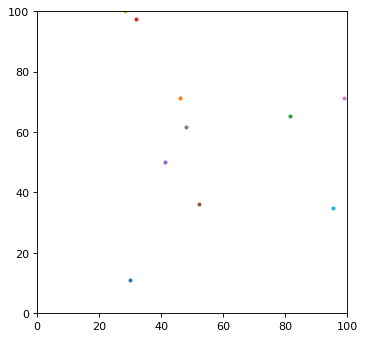

In [206]:
targets = [ped.target for ped in pedestrians]
plt.figure(figsize=(5,5), dpi=80)
plt.xlim(0,100)
plt.ylim(0,100)
for ped in pedestrians:
    plt.scatter(ped.target[0],ped.target[1], s=7, label=f"{ped}")

In [55]:
@widgets.interact(n=(1,steps,10))
def plot(n=1):
    plt.figure(figsize=(5,5), dpi=80)
    plt.xlim(0,100)
    plt.ylim(0,100)
    for ped in pedestrians:
        plt.scatter(ped.history[0,n],ped.history[1,n], s=3, label=f"{ped}")

interactive(children=(IntSlider(value=1, description='n', max=1000, min=1, step=10), Output()), _dom_classes=(…

'Constructs a Pedestrian. Add target for preferred direction.\n    Parameters\n    ----------\n    steps : int, optional\n            Number of steps the Pedestrian will perform.\n    speed : float, optional\n            determines the size of each step of the Pedestrian\n    \n    Returns\n    -------\n    out :  a pedestrian object.'

In [ ]:
norm(ped1.position - ped2.position)

ped2.speed * ped2.direction
x = ped2.history 
x -=  -0.62330191 
x
li = [1,3,4,1,5]
filter(lambda x: x != 1, li).to_list

In [ ]:
n=908
norm(ped1.history[:,n]-ped2.history[:,n]),ped2.history[:,n], ped1.history[:,n]

In [ ]:
ped1.history.shape

In [ ]:
#plt.scatter(ped.history[0,:],ped.history[1,:])

ped.direction
#ped.barrier()
print(ped.walk())

In [114]:
preferred = np.array([1,0])
def f(direction):
    return norm(preferred-direction)**2
x0 = np.array([-1,0])
minimize(f, x0).x


array([ 9.99999982e-01, -2.95072496e-08])

In [ ]:
# Use networkx defining station as a conencted graph and 1/0 for pepole in spot,
# probably best approach

In [ ]:
class Station:
    """Not used yet."""
    def __init__(self, size=100):
        self.station = np.array(size*size).reshape(size,size)

    
    def barrier(self):
        return self.barrier_e, self.barrier_w,  self.barrier_s, self.barrier_n
        

In [94]:
from numpy.linalg import norm

class Pedestrian:
    """Constructs a Pedestrian. Add target for preferred direction.
    Also fix direction change billiard style
    Parameters
    ----------
    steps : int, optional
            Number of steps the Pedestrian will perform.
    speed : float, optional
            determines the size of each step of the Pedestrian
    
    Returns
    -------
    out :  object"""
    
    def __init__(self, steps=20, speed=1, target="No target", position="Random start",
                 personal_space=10):
        self.rush = np.abs(rng.standard_normal()) # Not used
        self.speed = speed
        if type(position) != np.ndarray:
            self.position = 30 + 50*rng.standard_normal(2)
        else:
            self.position = position
        if type(target) != np.ndarray:
            self.direction = np.array([np.cos(rng.standard_normal()), 
                                   np.sin(rng.standard_normal())])
        else:
            self.target = target
            self.direction = ((self.target - self.position)/
                               norm(self.target - self.position))            
        self.direction_outlook = self.direction
        self.personal_space = personal_space
        self.history = np.zeros(2*(steps+1)).reshape(2,steps+1)
        self.current_step = 0
        
    
        
    def _interaction(self):
        self.speed = self.speed
        self.direction_outlook = np.array([np.cos(rng.standard_normal()), 
                                           np.sin(rng.standard_normal())])
        
    
    def assess_barrier(self,barrier_e,barrier_w,barrier_s,barrier_n):
        if self.position[0] < barrier_e:
            self._interaction()
            self.direction_outlook[0] = np.abs(self.direction_outlook[0])
        if self.position[0] > barrier_w:
            self._interaction()
            self.direction_outlook[0] = -np.abs(self.direction_outlook[0])       
        if self.position[1] < barrier_s:
            self._interaction()
            self.direction_outlook[1] = np.abs(self.direction_outlook[1])
        if self.position[1] > barrier_n:
            self._interaction()
            self.direction_outlook[1] = -np.abs(self.direction_outlook[1])
    
    def expected(self):
        return self.position + self.speed * self.direction
    
    def assess_players(self,other_pedestrians):
        assert type(other_pedestrians) == list, "Pass a list of pedestrians."
        assess_positions = []
        for ped in other_pedestrians:
            assess_positions.append(ped.expected())
        
    
            
            
            
            if norm(self.position - ped.position) < self.personal_space:
                toss_coin = rng.choice([0,1])
                if toss_coin != 0: # 50% change of interaction
                    self.direction_outlook[0] = ped.direction[0]
                    self.direction_outlook[1] = ped.direction[1]
                    
                    '''# Copy direction of neighbours
                    self.direction_outlook[0] = ped.direction[0]
                    self.direction_outlook[1] = ped.direction[1]
                    self.direction_outlook[0] = - ped.direction[1]
                    self.direction_outlook[1] = ped.direction[0]'''
                
    def walk(self):
        self.position += self.speed * self.direction_outlook
        self.current_step += 1
        self.history[:,self.current_step] = self.position
        self.direction = self.direction_outlook

In [177]:
x = np.arange(2*10).reshape(2,10)
y = np.array([1,1])
x, x-y.reshape(2,1)

this = x-y.reshape(2,1)
this, 1/(1+norm(this, axis = 0))

(array([[-1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]),
 array([0.0994492 , 0.09090909, 0.08301951, 0.07595595, 0.06972692,
        0.06426644, 0.05948349, 0.05528525, 0.05158687, 0.04831451]))